In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#data from kaggle https://www.kaggle.com/code/kareemellithy/employee-data-visualization-svm
df = pd.read_csv('/Users/eugeniaportillo/Desktop/Python Projects/Employee Dataset/Employee.csv')
df

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             3           1  
2                             2           0  
3                             5           1  
4                             2           1  
...                         ...         ...  
4648                          4           0  
4649                          2           1  
4650                          5           1  
4651                          2           0  
4652                          4           0  

[4653 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [16]:
df.nunique

<bound method DataFrame.nunique of       Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         

In [18]:
df.duplicated().sum()

np.int64(1889)

In [19]:
df = df.drop_duplicates()
df.shape

(2764, 9)

In [20]:
df.Education.value_counts()

Education
Bachelors    1971
Masters       637
PHD           156
Name: count, dtype: int64

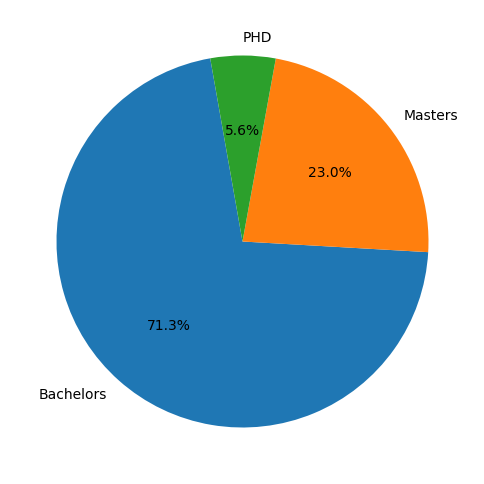

In [22]:
edu_count = df.Education.value_counts()
plt.figure(figsize=(6,8))
plt.pie(edu_count, labels=edu_count.index, autopct='%1.1f%%', startangle=100)
plt.show()

In [24]:
df.JoiningYear.value_counts()

JoiningYear
2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: count, dtype: int64

<Axes: xlabel='JoiningYear', ylabel='count'>

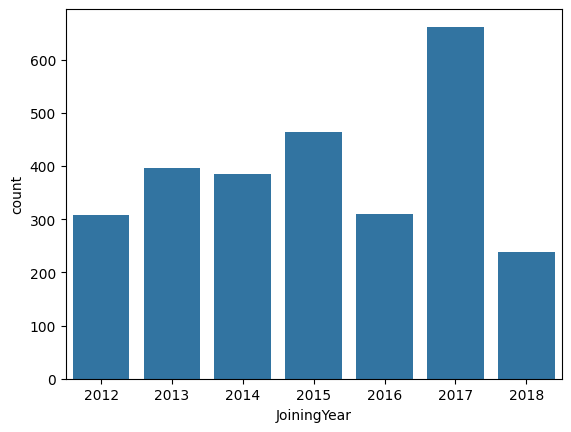

In [25]:
sns.countplot(data=df, x='JoiningYear')

In [26]:
pd.crosstab(df.JoiningYear, df.City, values=df.Age, aggfunc='median')

City         Bangalore  New Delhi  Pune
JoiningYear                            
2012              31.0       28.0  29.0
2013              30.0       28.0  29.0
2014              31.0       28.0  30.0
2015              31.0       28.0  30.0
2016              31.0       28.0  29.0
2017              30.0       30.0  30.0
2018              31.0       29.0  29.0

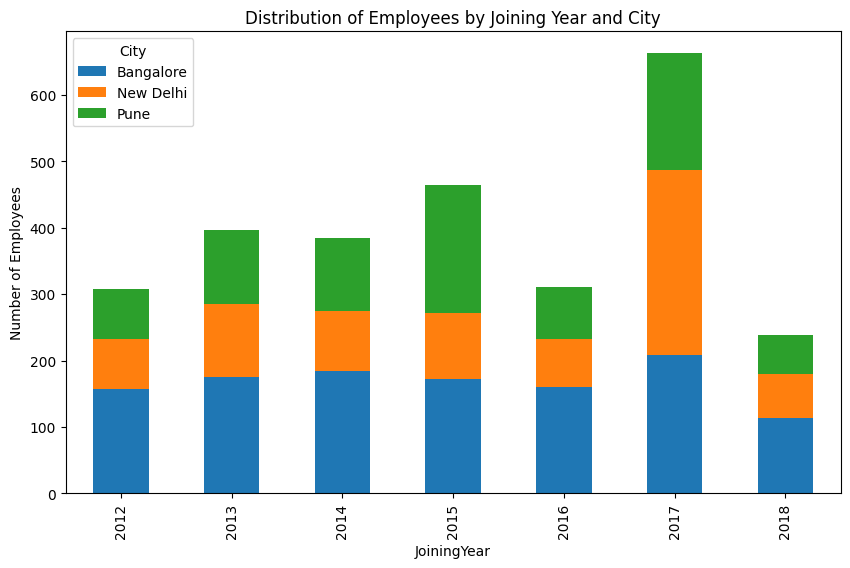

In [28]:
city_joinyear = df.groupby(['JoiningYear', 'City']).size().unstack()
ax = city_joinyear.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xlabel('JoiningYear')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Joining Year and City')

plt.legend(title='City', loc='upper left')
plt.show()

In [29]:
pd.crosstab(df.Gender, df.Education)

Education  Bachelors  Masters  PHD
Gender                            
Female           894      278   63
Male            1077      359   93

In [32]:
pivot_table = pd.crosstab(df['Gender'], df['Education'], values=df['Age'], aggfunc=['median', 'min', 'max'])

pivot_table = pivot_table.reset_index()
pivot_table

Gender    median                     min                   max  \
Education         Bachelors Masters   PHD Bachelors Masters PHD Bachelors   
0          Female      30.0    28.0  29.0        22      22  22        41   
1            Male      31.0    28.0  28.0        22      22  22        41   

                       
Education Masters PHD  
0              41  40  
1              41  41

<Axes: xlabel='Education', ylabel='count'>

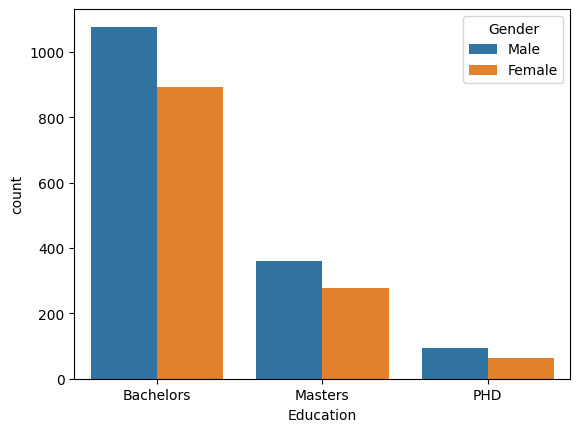

In [33]:
sns.countplot(data=df, x=df.Education, hue='Gender')

In [34]:
pd.crosstab(df.PaymentTier, df.Gender)

Gender       Female  Male
PaymentTier              
1               115   103
2               367   203
3               753  1223

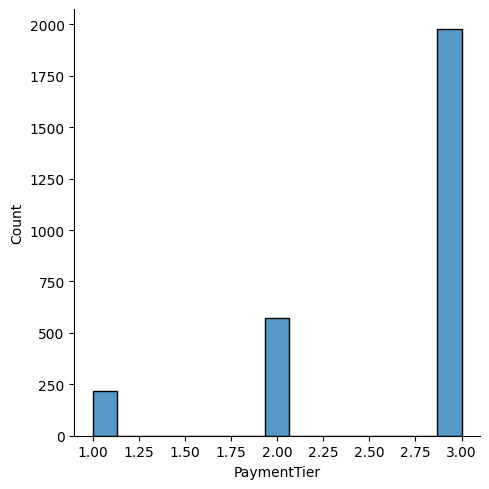

In [35]:
sns.displot(df['PaymentTier'])

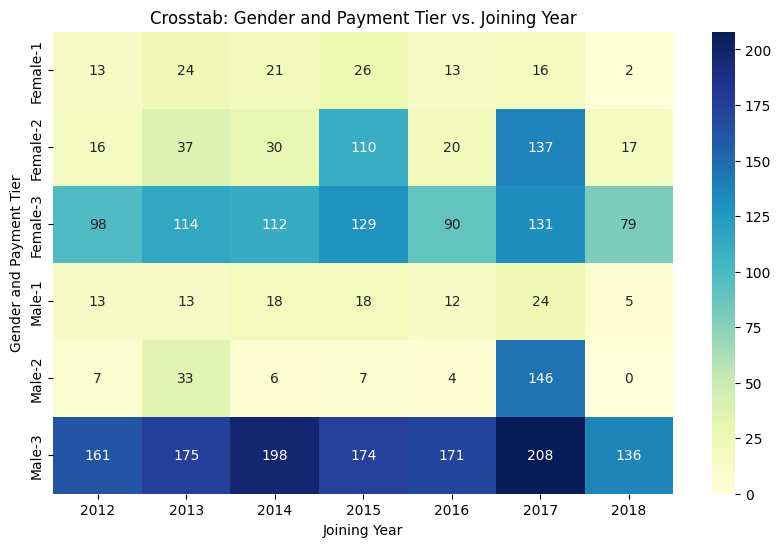

In [36]:
x=pd.crosstab([df.Gender,df.PaymentTier],df.JoiningYear)
plt.figure(figsize=(10, 6))
sns.heatmap(x, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Joining Year')
plt.ylabel('Gender and Payment Tier')
plt.title('Crosstab: Gender and Payment Tier vs. Joining Year')
plt.show()

In [37]:

df.EverBenched.value_counts()

EverBenched
No     2403
Yes     361
Name: count, dtype: int64

In [38]:
pd.crosstab(df.Gender,df.EverBenched)

EverBenched    No  Yes
Gender                
Female       1098  137
Male         1305  224

<Axes: xlabel='EverBenched', ylabel='count'>

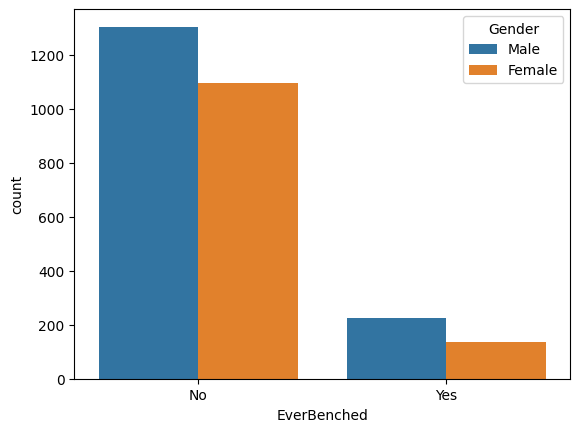

In [39]:
sns.countplot(data=df,x='EverBenched',hue='Gender')

<Figure size 1200x800 with 0 Axes>

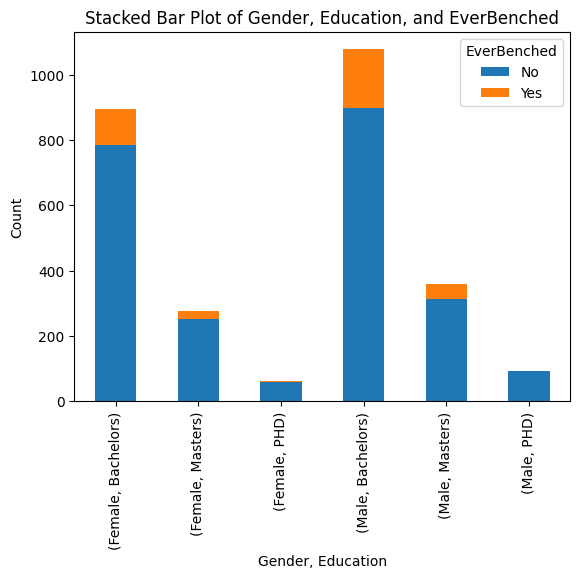

In [40]:

x = pd.crosstab([df['Gender'], df['Education']], df['EverBenched'])

plt.figure(figsize=(12, 8))

x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, Education, and EverBenched')
plt.xlabel('Gender, Education')
plt.ylabel('Count')

# Show the plot
plt.show()


In [41]:
pd.crosstab(df.ExperienceInCurrentDomain,df.Gender)

Gender                     Female  Male
ExperienceInCurrentDomain              
0                             119   168
1                             192   241
2                             302   379
3                             202   249
4                             204   221
5                             210   260
6                               2     6
7                               4     5

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

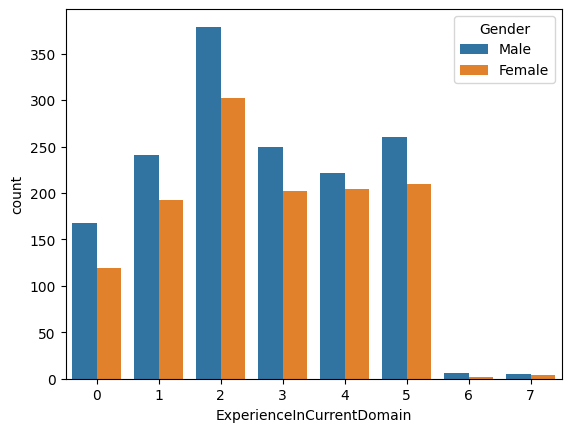

In [42]:

sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='Gender')

In [43]:
pd.crosstab(df.ExperienceInCurrentDomain,df.PaymentTier)

PaymentTier                 1    2    3
ExperienceInCurrentDomain              
0                          23   56  208
1                          35   75  323
2                          48  167  466
3                          37   92  322
4                          32   91  302
5                          41   87  342
6                           1    1    6
7                           1    1    7

In [44]:
df.ExperienceInCurrentDomain.value_counts()

ExperienceInCurrentDomain
2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: count, dtype: int64

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

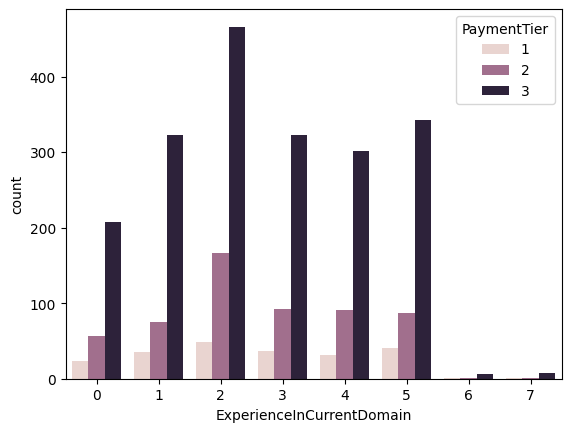

In [45]:

sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='PaymentTier')

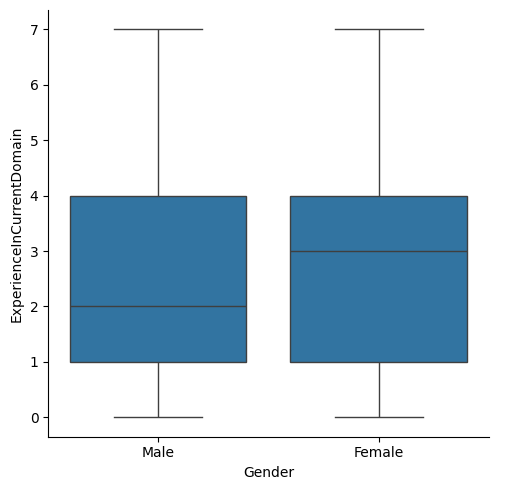

In [46]:
sns.catplot(data=df,x='Gender',y='ExperienceInCurrentDomain',kind='box')

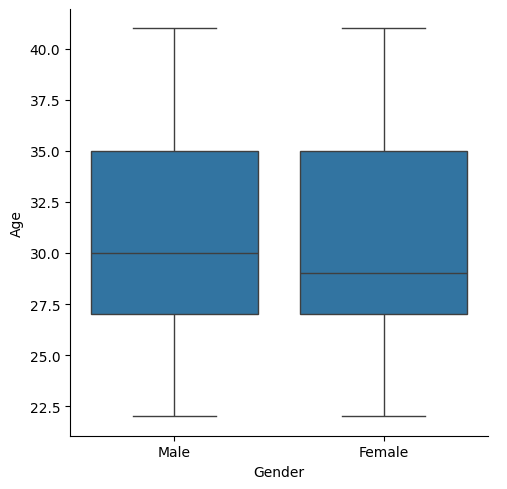

In [47]:
sns.catplot(data=df,x='Gender',y='Age',kind='box')

In [48]:
df.LeaveOrNot.value_counts()

LeaveOrNot
0    1676
1    1088
Name: count, dtype: int64

In [49]:
x=pd.crosstab([df.Gender,df.EverBenched],df.LeaveOrNot)
x

LeaveOrNot            0    1
Gender EverBenched          
Female No           558  540
       Yes           63   74
Male   No           916  389
       Yes          139   85

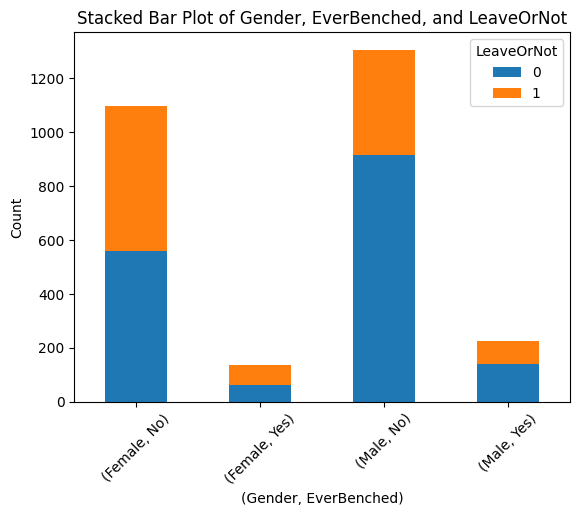

In [50]:
x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, EverBenched, and LeaveOrNot')
plt.xlabel('(Gender, EverBenched)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

NameError: name 'LabelEncoder' is not defined